In [5]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [216]:
def load_dataset():
    # 데이터 생성
    with open("../data/abalone.csv") as f:
        csvreader = csv.reader(f)
        next(csvreader)
        rows = []
        for row in csvreader:
            rows.append(row)
    
    # 원핫 인코딩
    data = np.zeros([len(rows), len(rows[0]) + 2]) # one hot encoding으로 칼럼 2개가 늘어남
    for n, d in enumerate(rows):
        if rows[0] == "I": 
            data[n, 0] = 1
        elif rows[0] == "M":
            data[n, 1] = 1
        else:
            data[n, 2] = 1
        data[n, 3:] = rows[n][1:]
    
    X_array = data[:, :-1].T
    y_array = data[:, -1]
    
    # split train and test data
    total_m = X_array.shape[1]
    indice = np.arange(total_m)
    np.random.shuffle(indice)
    X_train = X_array[:, indice[:int(total_m*0.8)]]
    X_test = X_array[:, indice[int(total_m*0.8):]]
    y_train = y_array[indice[:int(total_m*0.8)]].reshape(1,-1)
    y_test = y_array[indice[int(total_m*0.8):]].reshape(1,-1)
    
    return X_train, y_train, X_test, y_test



def initialize_params(dim): # dim은 파라미터 w의 차원
    w = np.random.normal(0, 0.03, [dim, 1])
    b = 0
    
    return w, b



def propagate(w, b, X, y):
    
    A = np.matmul(w.T, X) + b
    m = X.shape[1] # input dimension
    
    cost = (1/m) * np.sum((A-y)**2)
    
    dw = (2/m) * np.matmul(X, (A-y).T)
    db = (2/m) * np.sum(A-y)
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost



def optimize(w, b, X, y, epoch, lr, print_cost):
    costs = []
    
    for i in range(epoch):
        grads, cost = propagate(w, b, X, y)
        w = w - lr*grads['dw']
        b = b - lr*grads['db']
        
        if i % 100 == 0:
            costs.append(cost)
            
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {:.6f}".format(i, cost))
            
    params = {'w':w, 'b':b}
    grads = {'dw':grads['dw'], 'db':grads['db']}
    
    return params, grads, costs



def predict(X, w, b):
    return np.matmul(w.T, X) + b

def model(X_train, y_train, X_test, y_test, epoch = 2000, lr = 0.5, print_cost=True):
    # 1) 파라미터 초기화
    w, b = initialize_params(X_train.shape[0])
    
    # 2) 모델 최적화
    params, grads, costs = optimize(w, b, X_train, y_train, epoch, lr, print_cost)
    
    # 3) 파라미터 업데이트
    w = params['w']
    b = params['b']
    
    # 4) train/test error
    y_pred_train = predict(X_train, w, b)
    y_pred_test = predict(X_test, w, b)
    
    print("Train MSE: {:.6f}".format((1/m)*np.sum((y_pred_train - y_train)**2)))
    print("Test MSE: {:.6f}".format((1/m)*np.sum((y_pred_test - y_test)**2)))
    print("Train Acc: {:.6f}".format(1 - np.mean(np.abs((y_pred_train - y_train))/y_train)))
    print("Test Acc: {:.6f}".format(1 - np.mean(np.abs((y_pred_test - y_test))/y_test)))
    print("="*30)
    
    # 5) 모델링 결과
    d = {'w': w, 'b':b,
         'y_pred_train': y_pred_train, 'y_pred_test': y_pred_test,
         'learning_rate': lr, 'epoch': epoch,
         'costs': costs}
    return d

In [217]:
X_train, y_train, X_test, y_test = load_dataset()

In [218]:
# Check train, test set
m_train = X_train.shape[1]
m_test = X_test.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

Number of training examples: m_train = 3341
Number of testing examples: m_test = 836
train_set_x shape: (10, 3341)
train_set_y shape: (1, 3341)
test_set_x shape: (10, 836)
test_set_y shape: (1, 836)


In [221]:
model(X_train, y_train, X_test, y_test, lr = 0.1, epoch=100)

Cost after iteration 0: 108.143545
Train MSE: 6.976388
Test MSE: 1.758835
Train Acc: 0.803019
Test Acc: 0.797763


{'w': array([[-0.06360308],
        [ 0.01294981],
        [ 2.95856274],
        [ 1.85996355],
        [ 1.59109377],
        [ 0.66095094],
        [ 2.41549113],
        [-0.4368044 ],
        [ 0.346702  ],
        [ 1.66225945]]),
 'b': 2.949337336093075,
 'y_pred_train': array([[11.10687837,  8.70891557, 11.44722249, ...,  8.25534933,
         10.92351279,  9.96209553]]),
 'y_pred_test': array([[ 8.25918127, 10.7348441 ,  9.48722803, 10.30128061,  8.13086296,
          7.83789771, 11.13787228, 10.29651166,  7.59148612,  8.58900018,
         11.73547402,  7.47348118,  6.86704821,  7.52223984,  8.57014554,
          6.67261409, 10.07989301, 10.4094046 , 10.79367447, 12.23838264,
         10.01283956, 12.29019429, 10.9009499 ,  7.8368991 ,  9.15248725,
         10.69804663,  7.72791906,  7.97340214, 10.78080051, 11.51862734,
         11.5149465 ,  9.58679428,  7.74235461, 10.35660577,  9.45122503,
         11.16593228,  8.39282313, 12.47884895,  9.95542453,  9.18644348,
         13

`1_단층퍼셉트론 회귀_Abalone_minibatch있음.ipynb`에서는 mini batch마다 파라미터를 업데이트 해준다는 차이점이 있다. epoch = 100, lr = 0.1로 놓았을 때의 결과를 비교해보면 mini batch를 사용한 쪽의 결과가 Accracy상으로는 더 좋다.

Train MSE: 13.468217
Test MSE: 3.453218
Train Acc: 0.773480
Test Acc: 0.763729
Train MSE: 7.259993
Test MSE: 1.833280
Train Acc: 0.801437
Test Acc: 0.796125
Train MSE: 6.703655
Test MSE: 1.689182
Train Acc: 0.807299
Test Acc: 0.801956
Train MSE: 5.114549
Test MSE: 1.280089
Train Acc: 0.834385
Test Acc: 0.830255
Train MSE: 5.018514
Test MSE: 1.254567
Train Acc: 0.836005
Test Acc: 0.832306
Train MSE: 4.988059
Test MSE: 1.246368
Train Acc: 0.836468
Test Acc: 0.832967


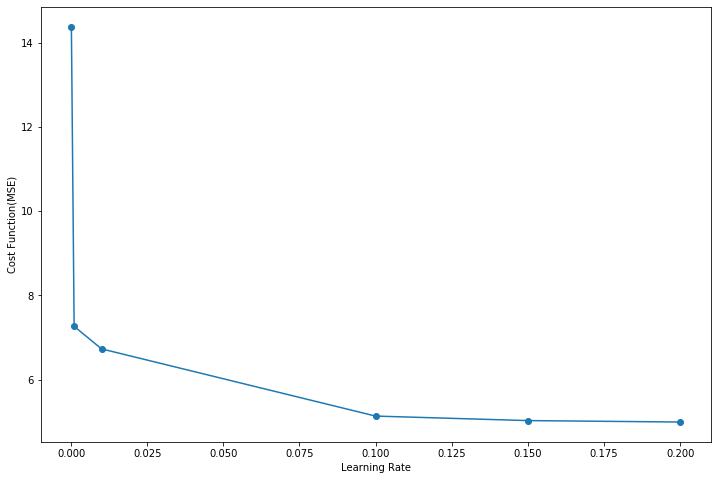

In [223]:
# learning rate에 따른 cost 변화

lr_lst = [0.0001, 0.001, 0.01, 0.1, 0.15, 0.2]

costs = []
for lr in lr_lst:
    d = model(X_train, y_train, X_test, y_test, lr = lr, epoch=2000, print_cost=False)
    costs.append(d['costs'][-1])
    
plt.figure(figsize=(12, 8))
plt.plot(lr_lst, costs, marker='o')
plt.xlabel("Learning Rate")
plt.ylabel("Cost Function(MSE)");